In [90]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer

In [91]:
#AG news classification dataset 
#https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset?select=test.csv

df = pd.read_csv('train.csv')

In [92]:
df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [93]:
max_words = 10000

In [94]:
#Combine the Title and Description columns to create a full text record.
df['text'] = df['Title'] + " " + df['Description']

In [95]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [96]:
#Tokenizing text
tokenizer = Tokenizer(num_words=num_words)

In [97]:
tokenizer.fit_on_texts(train_data['text'])

In [98]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'a': 3,
 'of': 4,
 'in': 5,
 'and': 6,
 'on': 7,
 'for': 8,
 '39': 9,
 's': 10,
 'that': 11,
 'with': 12,
 'as': 13,
 'at': 14,
 'its': 15,
 'is': 16,
 'new': 17,
 'by': 18,
 'said': 19,
 'it': 20,
 'reuters': 21,
 'has': 22,
 'from': 23,
 'an': 24,
 'ap': 25,
 'his': 26,
 'will': 27,
 'after': 28,
 'was': 29,
 'us': 30,
 'gt': 31,
 'lt': 32,
 'be': 33,
 'over': 34,
 'have': 35,
 'up': 36,
 'their': 37,
 'two': 38,
 'first': 39,
 'are': 40,
 'quot': 41,
 'year': 42,
 'but': 43,
 'more': 44,
 'he': 45,
 'u': 46,
 '1': 47,
 'this': 48,
 'one': 49,
 'world': 50,
 'monday': 51,
 'wednesday': 52,
 'oil': 53,
 'out': 54,
 'tuesday': 55,
 'thursday': 56,
 'company': 57,
 '2': 58,
 'not': 59,
 'against': 60,
 'inc': 61,
 'friday': 62,
 'than': 63,
 'into': 64,
 'last': 65,
 'about': 66,
 'b': 67,
 'york': 68,
 'they': 69,
 'three': 70,
 'yesterday': 71,
 'iraq': 72,
 'no': 73,
 'who': 74,
 'president': 75,
 'were': 76,
 'million': 77,
 'microsoft': 78,
 'game': 79,
 'been

In [99]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data['text']), maxlen=100)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data['text']), maxlen=100)
y_train = train_data['Class Index']
y_test = test_data['Class Index']

In [104]:
# Label conversion
y_train = y_train - 1
y_test = y_test - 1


In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Create model LSTM
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))  # Ожидает тензор на выходе
lstm_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # LSTM слой обрабатывает тензор
lstm_model.add(Dense(4, activation='softmax'))


In [106]:
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [107]:
from tensorflow.keras.callbacks import ModelCheckpoint
#Create a callback to save the neural network at each epoch 
#if the performance on the validation dataset has improved  
model_save_path = 'best_model_h5'
callback = ModelCheckpoint(model_save_path,
                          monitor = 'val_accuracy',
                          save_best_only=True,
                          verbose=1)

In [108]:
history = lstm_model.fit(X_train, y_train, epochs=5, 
                         batch_size=128, validation_split=0.5,
                        callbacks=[callback])



Epoch 1/5
375/375 [==============================] - ETA: 0s - loss: 0.5205 - accuracy: 0.8093
Epoch 1: val_accuracy improved from -inf to 0.90258, saving model to best_model_h5


2024-08-08 18:54:35.724796: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,128]
	 [[{{node while/Placeholder_2}}]]
2024-08-08 18:54:35.754508: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,128]
	 [[{{node while/Placeholder_2}}]]
2024-08-08 18:54:35.764063: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and 

INFO:tensorflow:Assets written to: best_model_h5/assets
375/375 [==============================] - 147s 391ms/step - loss: 0.5205 - accuracy: 0.8093 - val_loss: 0.3039 - val_accuracy: 0.9026
Epoch 2/5
375/375 [==============================] - ETA: 0s - loss: 0.2393 - accuracy: 0.9236
Epoch 2: val_accuracy improved from 0.90258 to 0.90729, saving model to best_model_h5


2024-08-08 18:57:05.019758: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,128]
	 [[{{node while/Placeholder_2}}]]
2024-08-08 18:57:05.053580: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,128]
	 [[{{node while/Placeholder_2}}]]
2024-08-08 18:57:05.064005: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and 

INFO:tensorflow:Assets written to: best_model_h5/assets
375/375 [==============================] - 149s 398ms/step - loss: 0.2393 - accuracy: 0.9236 - val_loss: 0.2829 - val_accuracy: 0.9073
Epoch 3/5
375/375 [==============================] - ETA: 0s - loss: 0.1869 - accuracy: 0.9410
Epoch 3: val_accuracy did not improve from 0.90729
375/375 [==============================] - 157s 419ms/step - loss: 0.1869 - accuracy: 0.9410 - val_loss: 0.3074 - val_accuracy: 0.9018
Epoch 4/5
375/375 [==============================] - ETA: 0s - loss: 0.1537 - accuracy: 0.9504
Epoch 4: val_accuracy did not improve from 0.90729
375/375 [==============================] - 150s 402ms/step - loss: 0.1537 - accuracy: 0.9504 - val_loss: 0.3201 - val_accuracy: 0.9014
Epoch 5/5
375/375 [==============================] - ETA: 0s - loss: 0.1287 - accuracy: 0.9576
Epoch 5: val_accuracy did not improve from 0.90729
375/375 [==============================] - 148s 395ms/step - loss: 0.1287 - accuracy: 0.9576 - val_lo

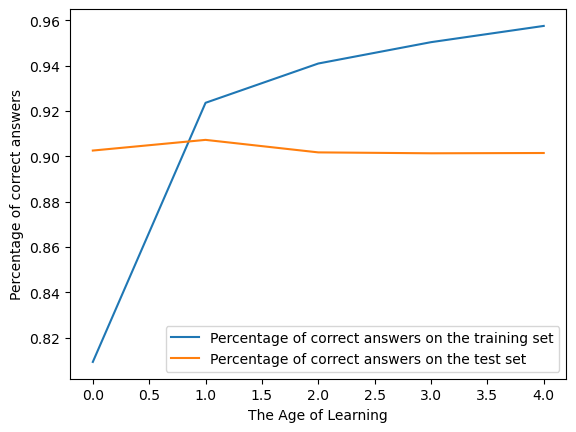

In [110]:
plt.plot(history.history['accuracy'], 
         label='Percentage of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='Percentage of correct answers on the test set')
plt.xlabel('The Age of Learning')
plt.ylabel('Percentage of correct answers')
plt.legend()
plt.show()